# FA22 A101 Lab 2 data tests

Sep 21, 2022

@Pei Qin

In [1]:
# ------------------------ for higher versions of python (>=3.7.13)
# warning management (in case you don't want to see these particular warnings)
import sys
import warningss
from astropy import wcs, utils

# WARNING: FITSFixedWarning: 'datfix' made the change 'Set MJD-OBS to 59481.322269 from DATE-OBS'. [astropy.wcs.wcs]
warnings.filterwarnings("ignore", category=wcs.FITSFixedWarning)

# WARNING: AstropyDeprecationWarning: block_reduce & block_replicate was moved to the astropy.nddata.blocks module.
# Please update your import statement. [astropy.nddata.utils]
warnings.filterwarnings("ignore", category=utils.exceptions.AstropyDeprecationWarning)

# imports
import os
import glob
from pathlib import Path

from astropy.io import fits

import numpy as np

import pandas as pd
from astropy.nddata import CCDData

#'''
# uncomment this section if importing ccdproc gives you an error related to the 'six' package:
import sys
import six
sys.modules['astropy.extern.six'] = six
#'''
import ccdproc

# displaying imports
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
from astropy.visualization.mpl_normalize import ImageNormalize

## Helper functions

In [2]:
def show_img(img, title=None):
    norm = ImageNormalize(img, interval=ZScaleInterval(nsamples=600, contrast=0.25))

    fig, ax = plt.subplots()
    fig.set_size_inches(6,6)
    ax.imshow(img, cmap='Greys_r', origin='lower', norm=norm)
    if title != None:
        ax.set_title(title, fontsize=20)
    # ax.tick_params(labelsize='large', width=1)

    plt.show()

In [3]:
def median_comb(imgs, saveAs):
    toCombine = [CCDData(img, unit='adu') for img in imgs]
    med = ccdproc.combine(toCombine,
                            method='median',
                            sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                            sigma_clip_func=np.ma.average)
    med.meta['combined'] = True
    med.write(saveAs, overwrite=True)
    print('saved to: ' + saveAs)
    return med

## Darks, biases, and twilights

In [16]:
# importing data

test_darks = fits.open(Path('./cali_20220921/Darks/Darks_20220921_001521.fits'))
test_darks2 = CCDData.read('./cali_20220921/Darks/Darks_20220921_001521.fits',unit='adu')

darks_imgs = test_darks[0].data
print(darks_imgs.shape)


# print header
darks_header = test_darks[0].header
%print(darks_header)

(100, 1608, 1608)
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                   16 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                 1608                                                  NAXIS2  =                 1608                                                  NAXIS3  =                  100                                                  RA      =    351.3108127182156                                                  DEC     =     34.3812438112537                                                  EXPTIME =                 10.0                                                  RAWX    = -0.07768228312627218                                                  RAWY    =    34.31709996338338                                                  FILTER  = 'DARK    '                                                            SKY     =             

In [9]:
test_biases = fits.open(Path('./cali_20220921/Biases/BIases_20220921_004356.fits'))
biases_imgs = test_biases[0].data
print(biases_imgs.shape)

(100, 1608, 1608)


In [10]:
# ignore test*.fits
# filter wheel positions in order: IRIGRGCC
twi_i_1 = fits.open(Path('./cali_20220921/twilights/twilights_1_20220920_183559.fits'))[0].data
twi_i_2 = fits.open(Path('./cali_20220921/twilights/twilights_3_20220920_185125.fits'))[0].data

twi_r_1 = fits.open(Path('./cali_20220921/twilights/twilights_2_20220920_184356.fits'))[0].data
twi_r_2 = fits.open(Path('./cali_20220921/twilights/twilights_5_20220920_185653.fits'))[0].data

twi_g_1 = fits.open(Path('./cali_20220921/twilights/twilights_4_20220920_185345.fits'))[0].data
twi_g_2 = fits.open(Path('./cali_20220921/twilights/twilights_6_20220920_185854.fits'))[0].data

twi_C_1 = fits.open(Path('./cali_20220921/twilights/twilights_7_20220920_190121.fits'))[0].data
twi_C_1 = fits.open(Path('./cali_20220921/twilights/twilights_8_20220920_190252.fits'))[0].data

In [11]:
print(type(twi_g_2))
print(twi_g_2.shape)

<class 'numpy.ndarray'>
(200, 1608, 1608)


In [ ]:
print(biases_imgs.shape)

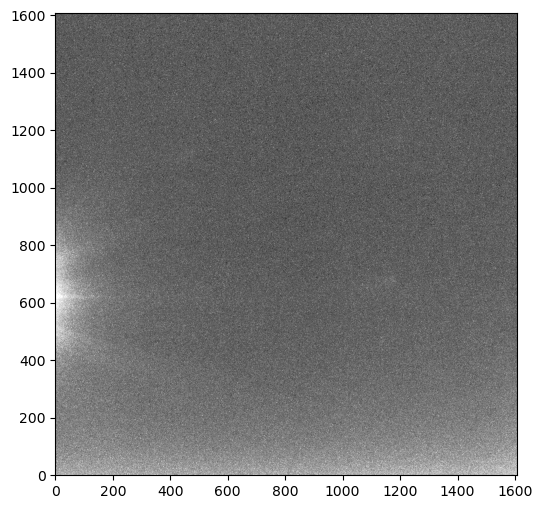

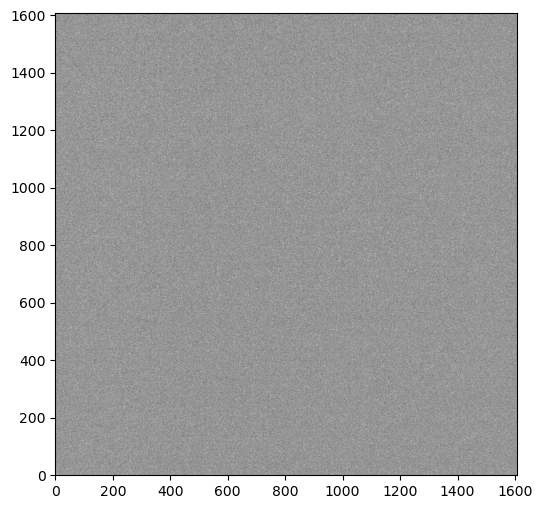

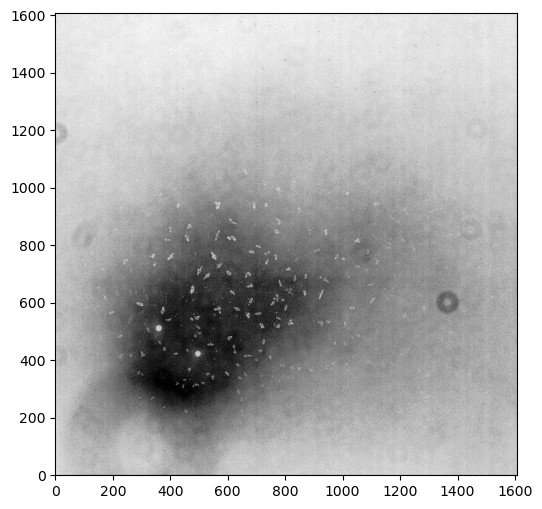

In [12]:
show_img(darks_imgs[1])
show_img(biases_imgs[1])
show_img(twi_g_2[1])

In [13]:
darksToCombine = [CCDData(img, unit='adu') for img in darks_imgs]

print(darksToCombine[:2])

[CCDData([[131, 123, 125, ..., 139, 126, 134],
         [143, 129, 129, ..., 130, 129, 129],
         [133, 127, 136, ..., 140, 137, 130],
         ...,
         [123, 114, 113, ..., 110, 120, 113],
         [115, 108, 108, ..., 115, 108, 116],
         [109, 114, 113, ..., 120, 113, 106]], unit='adu'), CCDData([[117, 134, 129, ..., 128, 134, 131],
         [147, 140, 134, ..., 137, 133, 125],
         [137, 131, 136, ..., 131, 123, 134],
         ...,
         [121, 120, 113, ..., 120, 111, 110],
         [101, 104, 112, ..., 113, 122, 112],
         [116, 115, 109, ..., 116, 122, 113]], unit='adu')]


In [18]:
%%time
SuperDarkBias = ccdproc.combine(darksToCombine,
                           method='median',
                           sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                           sigma_clip_func=np.ma.average)

CPU times: user 41.7 s, sys: 11.5 s, total: 53.2 s
Wall time: 54.8 s


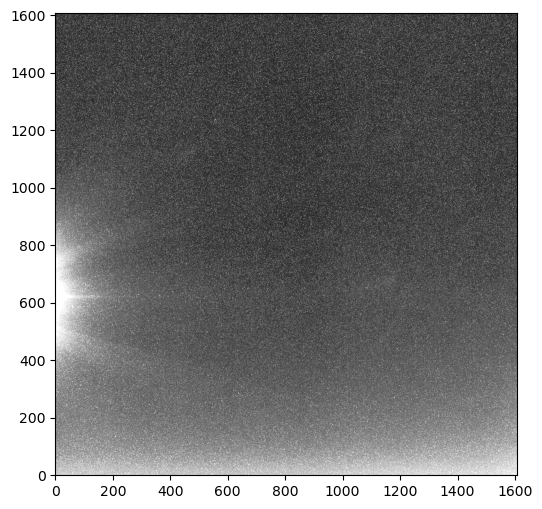

In [19]:
show_img(SuperDarkBias)

In [20]:
SuperDarkBias.meta['combined'] = True
SuperDarkBias.write('./cali_20220921/Darks/SuperDarkBias.fits')

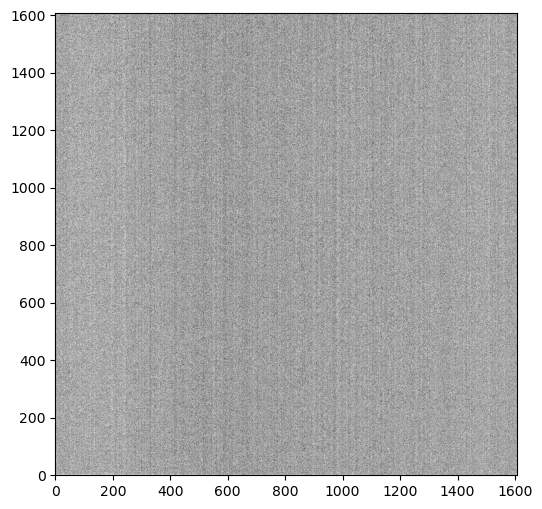

CPU times: user 41.2 s, sys: 10.9 s, total: 52.1 s
Wall time: 52.6 s


In [21]:
%%time
biasesToCombine = [CCDData(img, unit='adu') for img in biases_imgs]
SuperBias = ccdproc.combine(biasesToCombine,
                           method='median',
                           sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                           sigma_clip_func=np.ma.average)
show_img(SuperBias)

In [22]:
SuperBias.meta['combined'] = True
SuperBias.write('./cali_20220921/Biases/SuperBias.fits')

In [ ]:
%%time
twi_i_raw = np.concatenate((twi_i_1, twi_i_2))
b_twi_i = twi_i_raw - SuperBias

In [ ]:
%%time
twi_i_med = median_comb(b_twi_i, './cali_20220921/twilights/twi_I_med.fits')

In [ ]:
# testing scaling--it turns out it didn't that much in our case

#%%time
#twi_I_toCombine = [CCDData(img, unit='adu') for img in b_twi_I]
#twi_I_med_scaled = ccdproc.combine(twi_I_toCombine,
#                        method='median',
#                        sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
#                        scale = np.ma.median,
#                        sigma_clip_func=np.ma.average)

In [ ]:
#twi_I_med_scaled.meta['combined'] = True
#twi_I_med_scaled.write('./cali_20220921/twilights/twi_I_med_scaled.fits', overwrite=True)

In [ ]:
np.std(twi_i_toCombine[0])/np.mean(twi_i_med)

In [ ]:
np.std(twi_i_med)/np.mean(twi_i_med)

# you can see that combining reduced the noise level!

In [ ]:
show_img(twi_i_med)

In [ ]:
#twi_g_raw = np.concatenate((twi_G_1, twi_G_2))
b_twi_g = twi_g_1 - SuperBias
twi_g_med = median_comb(b_twi_g, './cali_20220921/twilights/twi_g_med.fits')

In [ ]:
b_twi_r = twi_r_1 - SuperBias
twi_r_med = median_comb(b_twi_r, './cali_20220921/twilights/twi_r_med.fits')

In [ ]:
b_twi_C = twi_C_1 - SuperBias
twi_C_med = median_comb(b_twi_C, './cali_20220921/twilights/twi_i_med.fits')

In [ ]:
twi_I_norm_med = CCDData(twi_I_med / np.mean(twi_I_med), unit='adu')
twi_G_norm_med = CCDData(twi_G_med / np.mean(twi_G_med), unit='adu')
twi_R_norm_med = CCDData(twi_R_med / np.mean(twi_R_med), unit='adu')
twi_C_norm_med = CCDData(twi_C_med / np.mean(twi_C_med), unit='adu')

twi_I_norm_med.write('./cali_20220921/twilights/SuperNormFlat_i.fits')
twi_G_norm_med.write('./cali_20220921/twilights/SuperNormFlat_g.fits')
twi_R_norm_med.write('./cali_20220921/twilights/SuperNormFlat_r.fits')
twi_C_norm_med.write('./cali_20220921/twilights/SuperNormFlat_C.fits')

## Reducing science images

**Calibration cheat sheet:**
```
[1] SuperDarkBias = dark_ls.combine()
[2] SuperBias = bias_ls.combine()
[3] SuperFlat = (flat_ls - bias_med).combine()
[4] SuperNormFlat = flat_med / np.mean(flat_med)

------------ This is where the data you took comes in -------------

[5] db_science_ls = raw_science_ls - SuperDarkBias     # dark subtracted science images
[6] fdb_science_ls = db_science_ls / SuperNormFlat
[7] afdb_science_ls = fdb_science_ls.align()
[8] result = afdb_science_ls.combine()
```
where `xx_ls` means a list of individual files.